## Chap1. The python programming language

In [1]:
100*2.5+50

300.0

In [2]:
log(1)

NameError: name 'log' is not defined

In [4]:
import math
math.log(1)

0.0

In [2]:
!pip install numpy

  Using cached numpy-2.4.0-cp313-cp313-macosx_14_0_arm64.whl.metadata (6.6 kB)
Using cached numpy-2.4.0-cp313-cp313-macosx_14_0_arm64.whl (5.2 MB)


In [3]:
import math
import numpy as np


In [ ]:
# Initial stock index level S0 =100
S0=100
# Strike price of the European call option K 
K=105
# Time to maturity T = 1 year
T=1.0
# Constant, riskless short rate r =0.05
r=0.05
# Constant volatility sigma =0.2
sigma=0.2


In [5]:
I = 100000

In [ ]:
np.random.seed(1000)
# seed value for the random number generator is fixed.

In [ ]:
z = np.random.standard_normal(I)
# standard normally distributed random numbers are drawn

In [ ]:
ST = S0*np.exp((r-sigma**2/2)*T + sigma*math.sqrt(T)*z)
# End-of-period values are simulated

In [ ]:
hT = np.maximum(ST - K, 0)
# The option payoffs at maturity are calculated

In [ ]:
C0 = math.exp(-r*T)*np.mean(hT)
# The Monte Carlo estimator is evaluated

In [ ]:
print('Value of the European call option: {:5.3f}'.format(C0))
# The resulting value estimate is printed

Value of the European call option: 8.019


In [15]:
!pip install pandas
!pip install matplotlib

  Using cached matplotlib-3.10.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-macosx_10_13_universal2.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
Using cached matplotlib-3.10.8-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl (274 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp313-cp313-macosx_10_13_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 56.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [20]:
plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] ='serif'
%matplotlib inline

In [22]:
data = pd.read_csv('data/tr_eikon_eod_data.csv', index_col=0, parse_dates=True)
data = pd.DataFrame(data['.SPX'])
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    1972 non-null   float64
dtypes: float64(1)
memory usage: 30.8 KB


In [23]:
data['rets'] = np.log(data / data.shift(1))
data['vola'] = data['rets'].rolling(252).std()*np.sqrt(252)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

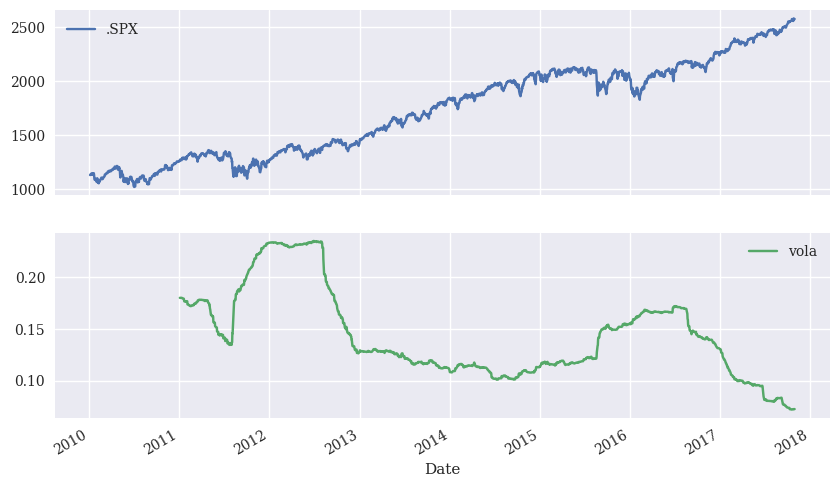

In [24]:
data[['.SPX', 'vola']].plot(subplots=True, figsize=(10,6))

Figure 1-1. S&P500 closing values and annualized volatility

In [26]:
import math
loops = 2500000
a = range(1, loops)
def f(x):
    return 3*math.log(x)+math.cos(x)**2
%timeit r=[f(x) for x in a]


256 ms ± 3.94 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
import numpy as np
a = np.arange(1, loops)
%timeit r = 3*np.log(a)+np.cos(a)**2

14.4 ms ± 165 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
!pip install numexpr

In [31]:
import numexpr as ne
ne.set_num_threads(1)
f = '3*log(a)+ cos(a)**2'
%timeit r = ne.evaluate(f)

14.4 ms ± 69.4 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [33]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

4.13 ms ± 65.7 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
ne.set_num_threads(8)
%timeit r = ne.evaluate(f)

2.23 ms ± 123 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [35]:
!pip install eikon

  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached websocket_client-1.9.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached certifi-2025.11.12-py3-none-any.whl.metadata (2.5 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached charset_normalizer-3.4.4-cp313-cp313-macosx_10_13_universal2.whl.metadata (37 kB)
  Using cached urllib3-2.6.2-py3-none-any.whl.metadata (6.6 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
Using cached requests-2.32.5-py3-none-any.whl (64 kB)
Using cached charset_normalizer-3.4.4-cp313-cp313-macosx_10_13_universal2.whl (208 kB)
Using cached urllib3-2.6.2-py3-none-any.whl (131 kB)
Using cached certifi-2025.11.12-py3-none-any.whl (159 kB)
Using cached httpx-0.28.1-py3-none-any.whl (73 kB)
Using cached httpcore-1.0.9-py3-none-any.whl (78 kB)
Using cached h11-0.16.0-py3-none-any.whl (37 kB)
Using cached websocket_client-1.9.0-py

In [36]:
import eikon as ek

In [ ]:
data = ek.get_timeseries('APPL.O', fields = '*', start_date='2025-10-18 16:00:00', 
                         end_date='2025-10-31 17:00:00',interval='tick')

HTTP request failed: 'NoneType' object has no attribute 'http_request'


In [43]:
data.info()

AttributeError: 'NoneType' object has no attribute 'info'

In [45]:
ek.set_log_level(1)  # Set log level to 1 (debug)


In [55]:
!pip list

Package                 Version
----------------------- -----------
anyio                   4.12.0
appdirs                 1.4.4
appnope                 0.1.4
asttokens               3.0.1
certifi                 2025.11.12
chardet                 3.0.4
charset-normalizer      3.4.4
comm                    0.2.3
contourpy               1.3.3
cycler                  0.12.1
DateTime                6.0
debugpy                 1.8.19
decorator               5.2.1
deprecation             2.1.0
eikon                   1.1.18
executing               2.2.1
fonttools               4.61.1
h11                     0.16.0
h2                      4.3.0
hpack                   4.1.0
httpcore                1.0.9
httpx                   0.28.1
hyperframe              6.1.0
idna                    2.10
ipykernel               7.1.0
ipython                 9.8.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
jupyter_client          8.7.0
jupyter_core            5.9.1
kiwisolver            